In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("Databases/2021/All_Player_Data.db")

In [3]:
query = ("""SELECT 
                player_name, time, team_title, League, npg, npxg,
                (CAST(npg AS REAL)*90)/time AS npg_p90,
                (npxg*90)/time AS npxg_p90
            FROM 
                All_Player_Data
            WHERE
                (position LIKE '%F%' OR position LIKE '%S%')
                AND npg>2 AND CAST(time AS INTEGER)>450
            ORDER BY (CAST(npg AS REAL)*90)/time DESC
    """)
df = pd.read_sql(query, conn)
epl = df.loc[df.League == 'EPL']
bundesliga = df.loc[df.League == 'Bundesliga']
la_liga = df.loc[df.League == 'La_liga']
serie_a = df.loc[df.League == 'Serie_A']
ligue_1 = df.loc[df.League == 'Ligue_1']

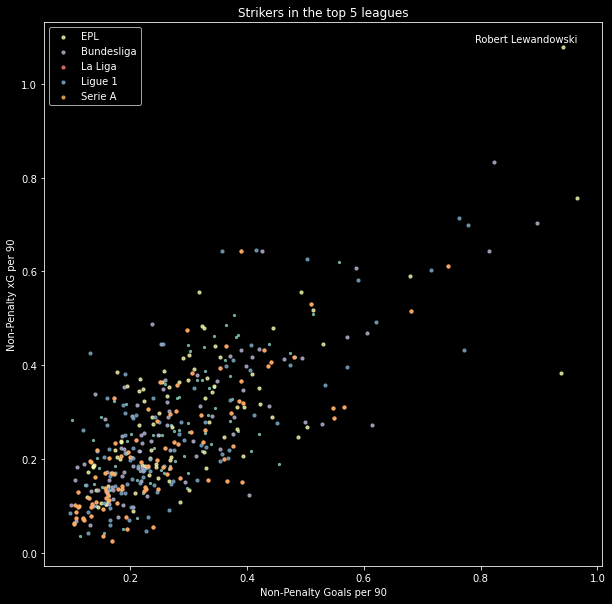

In [6]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.xlabel('Non-Penalty Goals per 90')
plt.ylabel('Non-Penalty xG per 90')
plt.title('Strikers in the top 5 leagues')

point_size = 10

plt.scatter(epl.npg_p90, epl.npxg_p90,5, alpha = 0.75)
plt.scatter(bundesliga.npg_p90, bundesliga.npxg_p90, point_size, alpha=.75, label='EPL')
plt.scatter(la_liga.npg_p90, la_liga.npxg_p90, point_size, alpha=.75, label='Bundesliga')
plt.scatter(serie_a.npg_p90, serie_a.npxg_p90, point_size, alpha=.75, label='La Liga')
plt.scatter(ligue_1.npg_p90, ligue_1.npxg_p90, point_size, alpha=.75, label='Ligue 1')
plt.scatter(serie_a.npg_p90, serie_a.npxg_p90, point_size, alpha=.75, label='Serie A')

player =  'Robert Lewandowski'
annotation = bundesliga.loc[bundesliga.player_name == player]
plt.annotate(player, (annotation.npg_p90-0.15, annotation.npxg_p90+0.01)) 

plt.legend(loc="upper left")
plt.show()

In [5]:
conn.close()